# Multi-Layer Perceptron (MLP)

## Introduction

A Multi-Layer Perceptron (MLP) is a class of feedforward artificial neural network (ANN) that consists of at least three layers of nodes: an input layer, a hidden layer, and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training.

## Architecture

The key characteristic of an MLP is that it is fully connected, meaning that each node in one layer connects with a certain weight to every node in the following layer. This architecture comprises multiple layers through which data is processed sequentially:

- **Input Layer**: Receives the input features. It acts as the entry point that transfers data to the hidden layers.
- **Hidden Layers**: The layers in between input and output layers where all the computation is done. Can have one or more hidden layers.
- **Output Layer**: The final layer that produces the output of the model. The function used in the output layer depends on the nature of the prediction task.

## How MLPs Work

### Forward Propagation

Data is passed through the network from the input layer to the hidden layers and finally to the output layer. Each neuron in the hidden layers transforms the values from the previous layer with a weighted linear summation followed by a non-linear activation function like sigmoid, tanh, or ReLU.

### Backpropagation

Once the output is obtained, MLP calculates the error in prediction, which is the difference between the actual output and the predicted output. The model then adjusts the weights in reverse from output to input by propagating the error back through the network layers. This process minimizes the error in predictions using gradient descent or other optimization techniques.

## Applications of MLP

MLPs are versatile and can be applied to various domains such as:

- **Image Recognition**: MLPs can classify images, recognize patterns or features.
- **Speech Recognition**: They are used to recognize spoken words and convert the audio signals into text.
- **Financial Forecasting**: MLPs help in predicting stock prices, risk management, and other financial attributes.
- **Medical Diagnosis**: They assist in diagnosing diseases based on symptoms and patient data.
- **Natural Language Processing**: MLPs are used in sentiment analysis, topic classification, and other text-related tasks.


# Sentiment Analysis with Multi-Layer Perceptron (MLP)

This notebook demonstrates the application of a Multi-Layer Perceptron (MLP), a type of neural network, to perform sentiment analysis on the IMDB movie reviews dataset. We aim to classify reviews as positive or negative based on their content.


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Explore the Dataset

First, we'll load the dataset and explore its structure and some basic statistics to understand the data better.


In [3]:
# Load the dataset
data = pd.read_csv('C:/Users/78641/Downloads/IMDB Dataset.csv')

# Display the first few rows of the dataframe
print(data.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [4]:
# Display general information about the dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


## Data Preprocessing

The text data needs to be converted into a format that can be interpreted by the MLP model. We'll clean and vectorize the text data, and encode the labels.


In [5]:
# Vectorizing the text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X = vectorizer.fit_transform(data['review'])

# Encoding the labels
le = LabelEncoder()
y = le.fit_transform(data['sentiment'])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building the MLP Model

We will configure a Multi-Layer Perceptron with a single hidden layer.


In [6]:
# Configuring the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)


## Training the Model

Now, let's train the MLP model on the preprocessed movie reviews.

In [7]:
# Training the MLP model
mlp.fit(X_train, y_train)


MLPClassifier(max_iter=300, random_state=42)

## Model Evaluation

Evaluate the model's performance on the unseen test data.


Accuracy: 0.8493
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



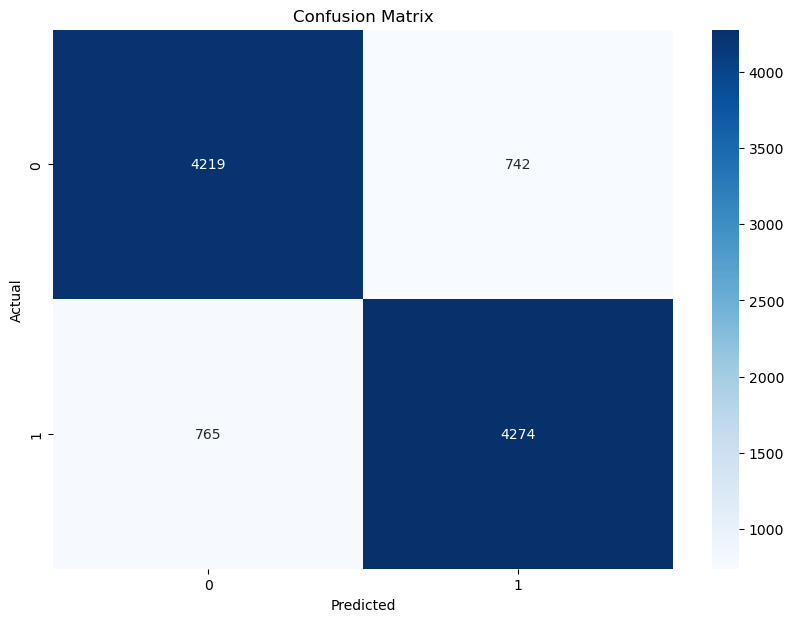

In [10]:
# Making predictions
y_pred = mlp.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plotting using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Model Performance Analysis

## Overview
The MLP model achieved an accuracy of 84.93% on the IMDB movie review sentiment analysis task. This performance is commendable and indicates that the model is generally effective in distinguishing between positive and negative reviews.

## Performance Metrics

### Accuracy
- **Overall Accuracy**: 84.93%
  - The model correctly predicted the sentiment of approximately 85% of the reviews in the test set.

### Precision and Recall
- **Precision** (Positive Predictive Value):
  - **Class 0 (Negative Reviews)**: 85%
  - **Class 1 (Positive Reviews)**: 85%
- **Recall** (True Positive Rate):
  - **Class 0 (Negative Reviews)**: 85%
  - **Class 1 (Positive Reviews)**: 85%

These metrics indicate that the model is equally skilled at identifying both negative and positive reviews. The balance between precision and recall suggests that the model does not overly favor one class over the other.

### F1-Score
- **Class 0 (Negative Reviews)**: 85%
- **Class 1 (Positive Reviews)**: 85%
  
The F1-score, which balances precision and recall, is also 85% for both classes, further confirming the model's balanced performance across both categories of sentiment.

## Confusion Matrix Analysis
The confusion matrix provides further insight into the model's performance:

- **True Positives for Class 1 (Positive Reviews)**: 4274
- **True Negatives for Class 0 (Negative Reviews)**: 4219
- **False Positives**: 742 (Negative reviews incorrectly classified as Positive)
- **False Negatives**: 765 (Positive reviews incorrectly classified as Negative)

The relatively similar numbers of false positives and false negatives suggest that the model's errors are evenly distributed across both classes.

## Conclusion
The MLP model demonstrates strong performance in classifying the sentiment of IMDB movie reviews. With an overall accuracy of nearly 85% and balanced precision, recall, and F1-scores across both sentiment classes, the model proves effective for this binary classification task. Future work could explore model optimization techniques such as adjusting network architecture, experimenting with different activation functions, or employing more sophisticated natural language processing techniques like word embeddings to potentially boost performance further.


